In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_auc_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS


In [27]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs



In [10]:
data = pd.read_csv(r'C:\Users\Mir Sahib\Desktop\Project-Andromeda-Major\Dataset\Fusing_Geometric_Feature_Extracted\fusing_geometric.csv')


In [11]:
data = data.fillna(data.mean())
data.head()


,JJ_d: L0_L1,JJ_d: L1_L2,JJ_d: L2_L3,JJ_d: L2_L4,JJ_d: L4_L5,JJ_d: L5_L6,JJ_d: L6_L7,JJ_d: L2_L8,JJ_d: L8_L9,JJ_d: L9_L10,...,JJ_o: L11_L18 Z,JJ_o: L14_L18 X,JJ_o: L14_L18 Y,JJ_o: L14_L18 Z,JL_d: p0_p7_p9,JL_d: p1_p8_p10,JL_d: p19_p2_p3,JL_d: p4_p13_p15,JL_d: p5_p14_p16,label
0,28.705400,28.930952,28.792360,29.017236,28.705400,28.705400,28.913665,29.068884,27.946377,28.653098,...,-0.047149,-0.910708,-0.062807,-0.408248,76.800672,72.867098,5.368380,16.595102,103.946313,1
1,27.910571,27.730849,27.946377,27.586228,27.147744,30.133038,28.178006,29.068884,26.645825,26.267851,...,-0.056028,-0.890871,-0.089087,-0.445435,76.326624,72.600788,2.236190,15.524110,101.578927,1
2,32.588341,32.588341,32.572995,32.893768,33.615473,34.014703,33.256578,33.555923,34.014703,34.438351,...,-0.065247,-0.859455,-0.110897,-0.499038,76.259121,72.675846,1.340337,13.905638,98.549980,1
3,29.883106,30.232433,31.780497,30.232433,28.792360,29.580399,7.681146,7.348469,7.549834,8.124038,...,-0.037734,-0.878938,-0.087894,-0.468767,77.377520,73.358941,5.357323,12.949639,101.281541,1
4,8.124038,8.660254,7.348469,7.681146,8.660254,8.306624,8.831761,7.280110,9.695360,7.141428,...,-0.047149,-0.872008,-0.090208,-0.481108,76.996056,72.212629,3.167000,13.905638,98.593124,1


In [12]:
X = data.drop('label',axis=1)
y = data['label']
X.shape,y.shape

((22797, 141), (22797,))

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_train.shape, X_test.shape


((18237, 141), (4560, 141))

## Step forward feature selection

In [14]:
sfs = SFS(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs = -1),
         k_features = 7,
          forward= True,
          floating = False,
          verbose= 2,
          scoring= 'accuracy',
          cv = 4,
          n_jobs= -1
         ).fit(X_train, y_train)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 141 out of 141 | elapsed:  8.6min finished

[2020-03-17 00:03:37] Features: 1/7 -- score: 0.209848359323331[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:  8.4min finished

[2020-03-17 00:12:02] Features: 2/7 -- score: 0.3027392915897105[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 139 out of 139 | elapsed:  8.3min finished

[2020-03-17 00:20:19] Features: 3/7 -- score: 0.42468050083768816[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 138 out of 1

In [22]:
sfs.k_feature_names_


('JJ_o: L2_L4 Y',
 'JJ_o: L10_L11 Z',
 'JJ_o: L14_L15 X',
 'JJ_o: L6_L10 Y',
 'JJ_o: L11_L14 X',
 'JJ_o: L11_L18 X',
 'JJ_o: L11_L18 Z')

In [23]:
sfs.k_feature_idx_


(44, 66, 76, 119, 127, 130, 132)

In [24]:
sfs.k_score_

0.7166713843441412

In [25]:
pd.DataFrame.from_dict(sfs.get_metric_dict()).T


,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(76,)","[0.2091546211125712, 0.21394125383603682, 0.20...",0.209848,"(JJ_o: L14_L15 X,)",0.00585219,0.00365081,0.0021078
2,"(76, 127)","[0.2954445904511607, 0.31060938185006576, 0.29...",0.302739,"(JJ_o: L14_L15 X, JJ_o: L11_L14 X)",0.0100128,0.00624634,0.00360633
3,"(76, 127, 130)","[0.42772667542706966, 0.4364313897413415, 0.41...",0.424681,"(JJ_o: L14_L15 X, JJ_o: L11_L14 X, JJ_o: L11_L...",0.0133064,0.00830106,0.00479262
4,"(66, 76, 127, 130)","[0.5214629872974157, 0.5258658483121438, 0.507...",0.519657,"(JJ_o: L10_L11 Z, JJ_o: L14_L15 X, JJ_o: L11_L...",0.0111664,0.00696602,0.00402183
5,"(66, 76, 127, 130, 132)","[0.5957074025405169, 0.6025865848312144, 0.587...",0.596425,"(JJ_o: L10_L11 Z, JJ_o: L14_L15 X, JJ_o: L11_L...",0.00930614,0.00580552,0.00335182
6,"(44, 66, 76, 127, 130, 132)","[0.6616294349540078, 0.6698816308636563, 0.660...",0.666342,"(JJ_o: L2_L4 Y, JJ_o: L10_L11 Z, JJ_o: L14_L15...",0.00841071,0.00524692,0.00302931
7,"(44, 66, 76, 119, 127, 130, 132)","[0.7172579938677179, 0.7266549758877685, 0.708...",0.716671,"(JJ_o: L2_L4 Y, JJ_o: L10_L11 Z, JJ_o: L14_L15...",0.0104073,0.00649248,0.00374844


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x295d3b099c8>)

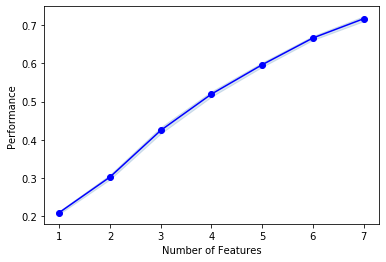

In [28]:
plot_sfs(sfs.get_metric_dict(), kind='std_dev')

## Step Backward feature selection

In [17]:
sbs = SFS(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs = -1),
         k_features = (1, 8),
          forward= False,
          floating = False,
          verbose= 2,
          scoring= 'accuracy',
          cv = 4,
          n_jobs= -1
         ).fit(X_train, y_train)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:   21.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:   21.8s finished

[2020-03-15 20:34:55] Features: 11/1 -- score: 0.5206225215347657[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   24.7s finished

[2020-03-15 20:35:20] Features: 10/1 -- score: 0.5228411502940018[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   24.6s finished

[2020-03-15 20:35:45] Features: 9/1 -- score: 0.5228462063955946[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of   9 | elapsed:   14.6s remaining:    4.2s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:   18.9s finished

[2020-03-15 20:36:04] Features: 8/1 -- score: 0.5237

In [18]:
sbs.k_score_


0.523728683085503

In [19]:
sbs.k_feature_names_


('RangeY', 'RangeZ', 'MeanX', 'MeanY', 'MeanZ', 'VarX', 'VarY', 'VarZ')

## Exhaustive feature selection

In [20]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS


In [21]:
efs = EFS(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1),
         min_features= 4,
          max_features= 7,
          scoring='accuracy',
          cv = None,
          n_jobs=-1
         ).fit(X_train, y_train)


/home/mirsahib/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
Features: 3003/3003

In [22]:
help(efs)


Help on ExhaustiveFeatureSelector in module mlxtend.feature_selection.exhaustive_feature_selector object:

class ExhaustiveFeatureSelector(sklearn.base.BaseEstimator, sklearn.base.MetaEstimatorMixin)
 |  ExhaustiveFeatureSelector(estimator, min_features=1, max_features=1, print_progress=True, scoring='accuracy', cv=5, n_jobs=1, pre_dispatch='2*n_jobs', clone_estimator=True)
 |  
 |  Exhaustive Feature Selection for Classification and Regression.
 |     (new in v0.4.3)
 |  
 |  Parameters
 |  ----------
 |  estimator : scikit-learn classifier or regressor
 |  min_features : int (default: 1)
 |      Minumum number of features to select
 |  max_features : int (default: 1)
 |      Maximum number of features to select
 |  print_progress : bool (default: True)
 |      Prints progress as the number of epochs
 |      to stderr.
 |  scoring : str, (default='accuracy')
 |      Scoring metric in {accuracy, f1, precision, recall, roc_auc}
 |      for classifiers,
 |      {'mean_absolute_error', 'm

In [23]:
efs.best_score_


1.0

In [24]:
efs.best_feature_names_


('RangeX', 'RangeY', 'RangeZ', 'MeanX')

In [25]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs


/home/mirsahib/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/mirsahib/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f824ccbcf10>)

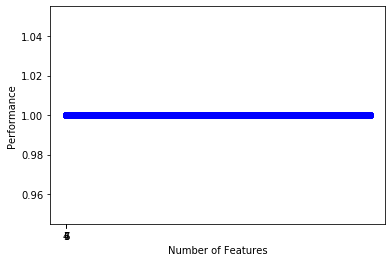

In [26]:
plot_sfs(efs.get_metric_dict(), kind='std_dev')
